In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


file_path = '/Users/yanlei/Documents/PhD/postdoc_3B/NEON_download/chemistry_plot_summary_NaturalDisturbance.csv'
df = pd.read_csv(file_path)

# Compute percent-change for organic (O) and mineral (M):
df['change_O'] = ((df['mean_after_O'] - df['mean_before_O']) / df['mean_before_O'])*100
df['change_M'] = ((df['mean_after_M'] - df['mean_before_M']) / df['mean_before_M'])*100

# Clean
df = df.dropna(subset=['change_O', 'change_M'])
mask = np.isfinite(df['change_O']) & np.isfinite(df['change_M'])
df_clean = df.loc[mask]

df.head(10)


,plotID,earliest_disturbance,latest_disturbance,mean_before_O,mean_after_O,mean_before_M,mean_after_M,years_offset,change_O,change_M
0,BART_004,10/29/19,10/29/19,44.156667,51.073333,3.667500,38.497500,10,15.663924,949.693252
1,BART_023,10/29/19,10/29/19,48.083333,52.213333,18.106667,13.293333,10,8.589255,-26.583211
2,BART_005,10/29/19,10/29/19,54.430000,53.096667,8.890000,23.763333,10,-2.449629,167.304087
3,BART_001,10/29/19,10/29/19,46.875000,49.816667,9.490000,34.675000,10,6.275556,265.384615
5,BART_003,10/29/19,10/29/19,44.206667,50.532500,2.323333,7.133333,10,14.309682,207.030129
6,BART_040,10/29/19,10/29/19,41.997500,49.043333,4.356667,24.900000,10,16.776792,471.537873
7,BART_071,10/29/19,10/29/19,42.170000,46.842500,5.400000,5.393333,10,11.080152,-0.123457
8,BART_042,10/29/19,10/29/19,45.610000,42.226667,5.696667,10.273333,10,-7.417964,80.339380
9,BART_036,10/29/19,10/29/19,39.710000,47.053333,5.546667,4.170000,10,18.492403,-24.819712
56,MLBS_005,6/27/18,7/27/18,5.883333,38.280000,3.563333,3.633333,10,550.651558,1.964453


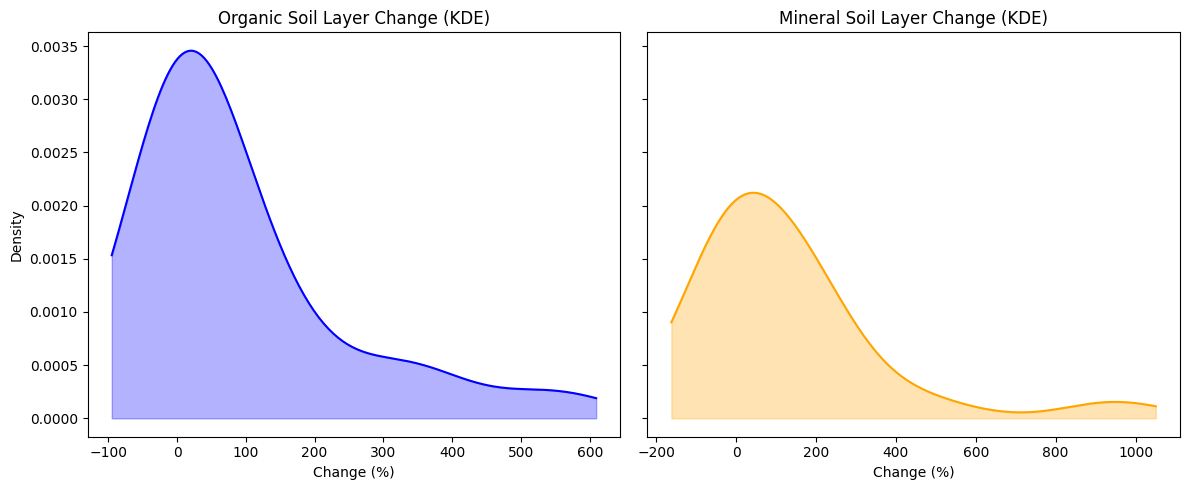

In [12]:
# Build a KDE for Organic layer
x_O = df_clean['change_O'].values
kde_O = gaussian_kde(x_O)
xmin_O, xmax_O = x_O.min(), x_O.max()
# Add a small margin so the curve doesn’t cut off at the edges
margin_O = (xmax_O - xmin_O) * 0.1
grid_O = np.linspace(xmin_O - margin_O, xmax_O + margin_O, 200)
dens_O = kde_O(grid_O)

# Build a KDE for Mineral layer
x_M = df_clean['change_M'].values
kde_M = gaussian_kde(x_M)
xmin_M, xmax_M = x_M.min(), x_M.max()
margin_M = (xmax_M - xmin_M) * 0.1
grid_M = np.linspace(xmin_M - margin_M, xmax_M + margin_M, 200)
dens_M = kde_M(grid_M)

# 6. Plot both KDEs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Organic layer KDE
axes[0].plot(grid_O, dens_O, color='blue')
axes[0].fill_between(grid_O, dens_O, color='blue', alpha=0.3)
axes[0].set_title('Organic Soil Layer Change (KDE)')
axes[0].set_xlabel('Change (%)')
axes[0].set_ylabel('Density')

# Mineral layer KDE
axes[1].plot(grid_M, dens_M, color='orange')
axes[1].fill_between(grid_M, dens_M, color='orange', alpha=0.3)
axes[1].set_title('Mineral Soil Layer Change (KDE)')
axes[1].set_xlabel('Change (%)')

plt.tight_layout()
plt.show()

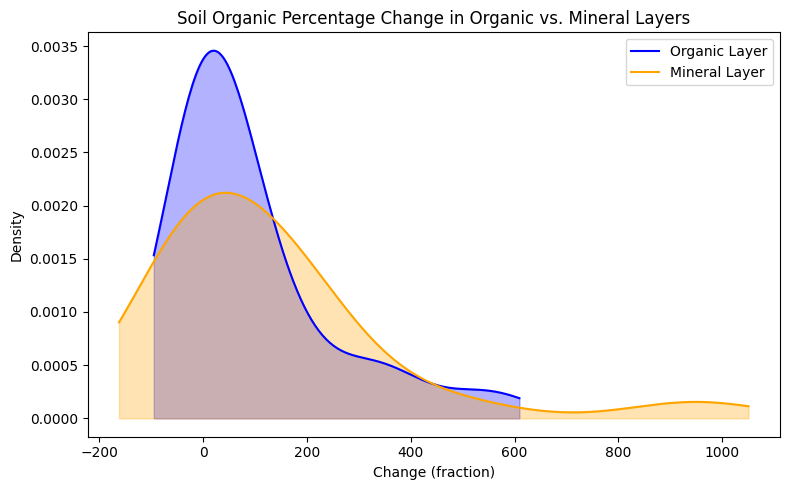

In [10]:
# Plot both KDEs on the same axes
plt.figure(figsize=(8, 5))
plt.plot(grid_O, dens_O, color='blue', label='Organic Layer')
plt.fill_between(grid_O, dens_O, color='blue', alpha=0.3)

plt.plot(grid_M, dens_M, color='orange', label='Mineral Layer')
plt.fill_between(grid_M, dens_M, color='orange', alpha=0.3)

plt.title('Soil Organic Percentage Change in Organic vs. Mineral Layers')
plt.xlabel('Change (fraction)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()